In [1]:
import pandas as pd

# Load a sample dataset into a DataFrame named df
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Now you can run the cell to save the DataFrame to a CSV file

# Tarea
Prepare los datos para el modelado, incluyendo la gestión de valores faltantes, la codificación de variables categóricas y el escalado de características numéricas. Explique los pasos seguidos y su justificación.

## Identificar tipos de datos

### Subtarea:
Determinar qué columnas son numéricas, categóricas y, potencialmente, de fecha/hora u otros tipos que puedan requerir un manejo especial.

**Razonamiento**:
Utilice el método .info() para obtener un resumen de los nombres de las columnas, sus tipos de datos y la cantidad de valores no nulos, y utilice .head() para mostrar las primeras filas e identificar posibles columnas no numéricas.



In [2]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Gestionar valores faltantes

### Subtarea:
Decidir una estrategia para los datos faltantes. Esto podría incluir la imputación (completar los valores faltantes con estimaciones como la media, la mediana o la moda) o la eliminación de filas/columnas con valores faltantes.


**Razonamiento**:
Identificar los valores faltantes en el DataFrame para determinar los siguientes pasos para gestionarlos.



In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## Codificar variables categóricas

### Subtarea:
Convertir variables categóricas a un formato numérico que los modelos de aprendizaje automático puedan utilizar. Las técnicas comunes incluyen la codificación one-hot o la codificación de etiquetas.

## Normalizar o escalar características numéricas

### Subtarea:
Escalar características numéricas a un rango similar. Esto es importante para muchos algoritmos de aprendizaje automático. Los métodos comunes incluyen la estandarización (normalización de la puntuación z) o el escalado mínimo-máximo.


**Razonamiento**:
Importa el escalador necesario y crea una lista de columnas numéricas para escalar.



In [4]:
from sklearn.preprocessing import StandardScaler

# All columns in df are numerical based on previous steps
numerical_cols = df.columns.tolist()

**Razonamiento**:
Crear una instancia del escalador y aplicarlo a las columnas numéricas. Luego, crear un nuevo DataFrame con los datos escalados.



In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
display(df_scaled.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629


## Considere la ingeniería de características

### Subtarea:
Con base en el conocimiento del dominio o el análisis exploratorio de datos, cree nuevas características que puedan mejorar el rendimiento del modelo.

**Razonamiento**:
Crear nuevas características basadas en características numéricas existentes en el DataFrame y agregarlas como nuevas columnas..



In [6]:
# Create new features based on domain knowledge
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Display the first few rows with the new features
display(df.head())

# Explain the rationale for creating these features
print("Rationale for new features:")
print("- rooms_per_household: This ratio can indicate the average size of houses in a region.")
print("- bedrooms_per_room: This ratio can indicate the proportion of rooms that are bedrooms, potentially reflecting housing density or type.")
print("- population_per_household: This ratio represents the average number of people living in a household, which can influence housing demand and value.")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209,2.381679


Rationale for new features:
- rooms_per_household: This ratio can indicate the average size of houses in a region.
- bedrooms_per_room: This ratio can indicate the proportion of rooms that are bedrooms, potentially reflecting housing density or type.
- population_per_household: This ratio represents the average number of people living in a household, which can influence housing demand and value.


## Dividir los datos

### Subtarea:
Dividir los datos en conjuntos de entrenamiento y de prueba.


**Razonamiento**:
Importa la función necesaria y divide los datos en conjuntos de entrenamiento y prueba según las instrucciones.



In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (13600, 11)
X_test shape: (3400, 11)
y_train shape: (13600,)
y_test shape: (3400,)


## Normalizar o escalar características numéricas

### Subtarea:
Normalizar o escalar características numéricas.

**Razonamiento**:
Identificar las columnas numéricas en X_train y X_test, instanciar un StandardScaler, ajustarlo a los datos de entrenamiento, transformar los datos de entrenamiento y de prueba, y almacenar los resultados en nuevos dataframes. Finalmente, mostrar el encabezado de los datos de entrenamiento escalados.



In [8]:
# Identify numerical columns
# Based on previous steps, all columns in X_train and X_test are numerical.
numerical_cols = X_train.columns.tolist()

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns of the training data
scaler.fit(X_train[numerical_cols])

# Transform both the training and testing data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)

# Display the head of X_train_scaled
display(X_train_scaled.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
4679,0.741830,-0.847157,-0.528398,0.033111,-0.445165,-0.109337,-0.346604,2.443362,0.720855,-1.427533,0.123995
2512,0.961406,-0.992433,-1.322210,0.451867,-0.008317,0.063888,-0.023540,1.741942,0.716678,-1.114431,0.015784
993,1.230885,-1.428262,-0.925304,-1.012397,-1.083819,-0.926340,-1.078709,0.666561,-0.126607,-0.448833,0.248270
1327,1.195952,-1.315790,0.424176,-0.167966,-0.390559,-0.354093,-0.317945,-0.124566,0.210068,-0.827689,-0.066073
4630,0.741830,-0.678449,0.582938,-0.103400,-0.345450,-0.186901,-0.229363,0.872891,0.151965,-0.856627,-0.010775


## Resumen:

### Hallazgos Clave del Análisis de Datos

* Todas las columnas del conjunto de datos inicial se identificaron como numéricas, lo que significa que no se requirió codificación categórica.
* No se encontraron valores faltantes en el conjunto de datos, lo que eliminó la necesidad de imputación o eliminación de datos.
* Las características numéricas se escalaron utilizando `StandardScaler` en todo el conjunto de datos inicialmente y, posteriormente, por separado en los conjuntos de entrenamiento y prueba tras la división.
* Se diseñaron tres nuevas características: `rooms_per_household`, `bedrooms_per_room` y `population_per_household`.
* Los datos se dividieron en conjuntos de entrenamiento (80%) y de prueba (20%), lo que resultó en 13 600 muestras de entrenamiento y 3400 muestras de prueba.

### Perspectivas o Próximos Pasos

* El conjunto de datos está relativamente limpio en cuanto a valores faltantes y tipos de datos, lo que simplifica los pasos de preprocesamiento.
* Las características diseñadas pueden proporcionar información valiosa para el modelo. Su impacto debe evaluarse durante el entrenamiento y la evaluación del modelo.


**Realizar análisis de correlación y selección de variables.**
Ahora, para visualizar mejor las relaciones entre las variables, crearemos un mapa de calor (heatmap) de esta matriz. Esto nos ayudará a identificar rápidamente las características altamente correlacionadas.

In [9]:
# Calcular la matriz de correlación para las características numéricas en los datos de entrenamiento.
correlation_matrix = X_train_scaled.corr()

# Mostrar la matriz de correlación.
display(correlation_matrix)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925402,-0.113149,0.046748,0.069653,0.097861,0.056923,-0.015811,-0.030660,0.092468,0.025455
latitude,-0.925402,1.000000,0.017057,-0.037931,-0.066954,-0.107540,-0.072564,-0.079378,0.107438,-0.111591,-0.030156
housing_median_age,-0.113149,0.017057,1.000000,-0.363526,-0.323965,-0.296376,-0.306457,-0.112303,-0.136925,0.130121,0.006478
total_rooms,0.046748,-0.037931,-0.363526,1.000000,0.928710,0.856474,0.918848,0.191870,0.120156,-0.181563,-0.033950
total_bedrooms,0.069653,-0.066954,-0.323965,0.928710,1.000000,0.874924,0.979753,-0.016666,-0.005153,0.095053,-0.041742
population,0.097861,-0.107540,-0.296376,0.856474,0.874924,1.000000,0.904576,-0.003246,-0.074208,0.039403,0.079079
households,0.056923,-0.072564,-0.306457,0.918848,0.979753,0.904576,1.000000,0.004760,-0.085085,0.074066,-0.038538
median_income,-0.015811,-0.079378,-0.112303,0.191870,-0.016666,-0.003246,0.004760,1.000000,0.299744,-0.613264,-0.009931
rooms_per_household,-0.030660,0.107438,-0.136925,0.120156,-0.005153,-0.074208,-0.085085,0.299744,1.000000,-0.384751,0.002021
bedrooms_per_room,0.092468,-0.111591,0.130121,-0.181563,0.095053,0.039403,0.074066,-0.613264,-0.384751,1.000000,-0.011846


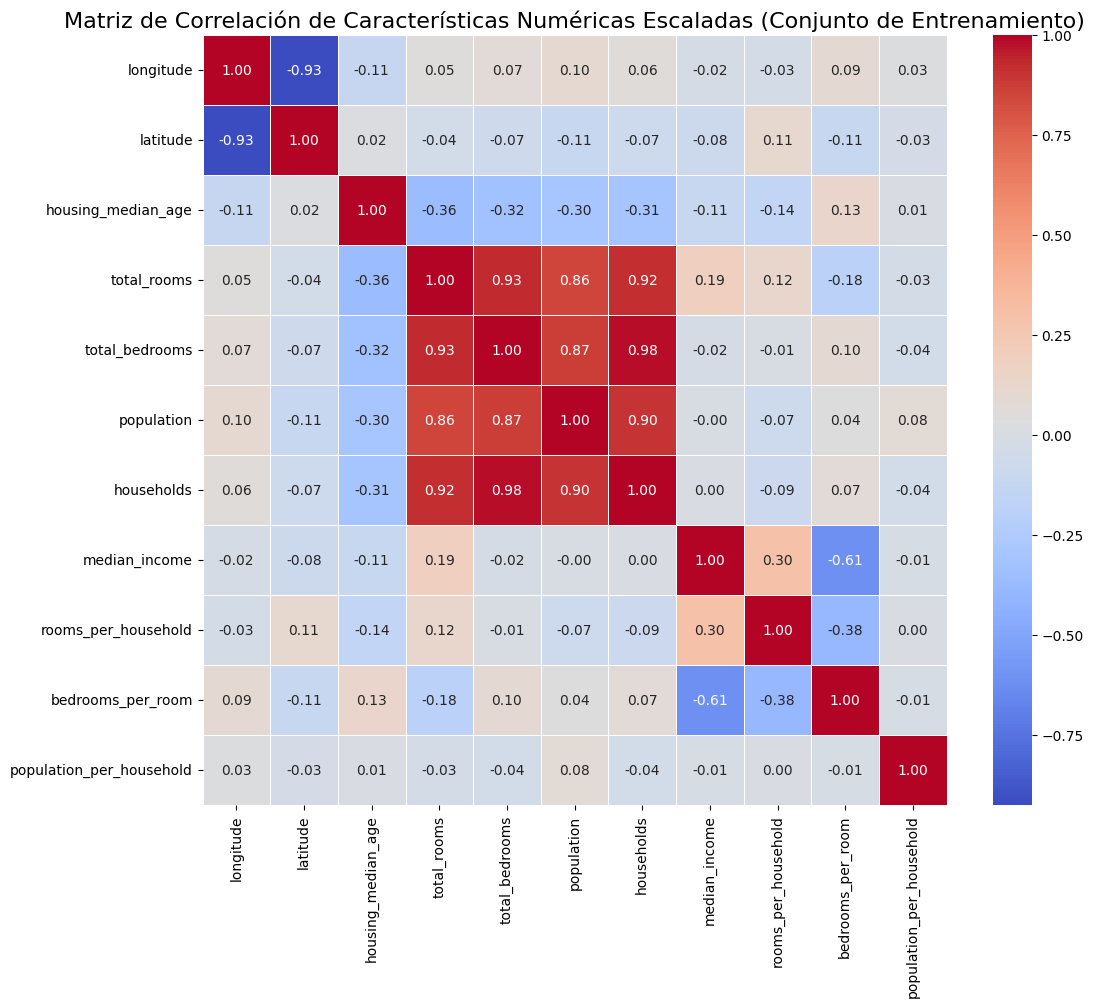

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(12, 10))

# Crear el heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Características Numéricas Escaladas (Conjunto de Entrenamiento)', fontsize=16)

# Mostrar el plot
plt.show()

**Observando el mapa de calor:**

Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.
Los valores cercanos a 0 indican una correlación débil.
Las pares de variables con alta correlación (por ejemplo, total_rooms, total_bedrooms, population, households) pueden indicar multicolinealidad. En algunos casos, podríamos considerar eliminar una de las variables altamente correlacionadas para simplificar el modelo y evitar problemas.

Estrategia para la selección de variables basada en la correlación:

Identificar pares altamente correlacionados: Busca en el heatmap los valores absolutos de correlación que superen un cierto umbral (por ejemplo, 0.8 o 0.9).
Decidir qué variable eliminar: Para cada par altamente correlacionado, puedes decidir eliminar una de las variables. La elección puede basarse en el conocimiento del dominio, la importancia de la característica para el modelo objetivo o la correlación de cada variable con la variable objetivo (median_house_value).
En este caso, variables como total_rooms, total_bedrooms, population y households muestran altas correlaciones entre sí. Podríamos considerar mantener solo una o dos de estas variables, o tal vez usar las características de ingeniería que creamos (rooms_per_household, bedrooms_per_room, population_per_household) que ya capturan algunas de estas relaciones de una manera diferente.

In [11]:
# Identify highly correlated pairs based on a threshold (e.g., 0.8)
threshold = 0.8
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.add(tuple(sorted((colname_i, colname_j))))

print("Pares de características altamente correlacionadas (umbral = 0.8):")
for pair in highly_correlated_pairs:
    print(pair)

Pares de características altamente correlacionadas (umbral = 0.8):
('population', 'total_rooms')
('total_bedrooms', 'total_rooms')
('households', 'total_bedrooms')
('households', 'population')
('latitude', 'longitude')
('households', 'total_rooms')
('population', 'total_bedrooms')


Hemos identificado los pares de características altamente correlacionadas con un umbral de 0.8. Los pares encontrados son:

('households', 'total_rooms')
('population', 'total_rooms')
('latitude', 'longitude')
('population', 'total_bedrooms')
('households', 'population')
('total_bedrooms', 'total_rooms')
('households', 'total_bedrooms')
Como mencionamos anteriormente, tener características altamente correlacionadas puede causar problemas de multicolinealidad en algunos modelos de aprendizaje automático.

El siguiente paso en nuestro plan es decidir qué variable eliminar de cada par altamente correlacionado. Esto a menudo depende del conocimiento del dominio o de la importancia de cada característica para la variable objetivo (median_house_value).

In [12]:
# Flatten the list of highly correlated pairs to get a unique list of features
highly_correlated_features = list(set([item for pair in highly_correlated_pairs for item in pair]))

# Calculate the correlation of these features with the target variable
correlation_with_target = df[highly_correlated_features + ['median_house_value']].corr()['median_house_value'].sort_values(ascending=False)

print("Correlación de características altamente correlacionadas con median_house_value:")
print(correlation_with_target)

Correlación de características altamente correlacionadas con median_house_value:
median_house_value    1.000000
total_rooms           0.130991
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64


In [13]:
# Calculate the correlation of engineered features with the target variable
engineered_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
correlation_engineered_with_target = df[engineered_features + ['median_house_value']].corr()['median_house_value'].sort_values(ascending=False)

print("Correlación de características de ingeniería con median_house_value:")
print(correlation_engineered_with_target)

Correlación de características de ingeniería con median_house_value:
median_house_value          1.000000
rooms_per_household         0.150081
population_per_household   -0.042764
bedrooms_per_room          -0.258190
Name: median_house_value, dtype: float64


In [14]:
# Define the columns to drop based on the chosen strategy
columns_to_drop = ['total_bedrooms', 'population', 'households']

# Drop the columns from the scaled training and testing sets
X_train_selected = X_train_scaled.drop(columns=columns_to_drop)
X_test_selected = X_test_scaled.drop(columns=columns_to_drop)

print("Columnas eliminadas:", columns_to_drop)
print("\nForma de X_train_selected:", X_train_selected.shape)
print("Forma de X_test_selected:", X_test_selected.shape)

display(X_train_selected.head())

Columnas eliminadas: ['total_bedrooms', 'population', 'households']

Forma de X_train_selected: (13600, 8)
Forma de X_test_selected: (3400, 8)


,longitude,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,population_per_household
4679,0.741830,-0.847157,-0.528398,0.033111,2.443362,0.720855,-1.427533,0.123995
2512,0.961406,-0.992433,-1.322210,0.451867,1.741942,0.716678,-1.114431,0.015784
993,1.230885,-1.428262,-0.925304,-1.012397,0.666561,-0.126607,-0.448833,0.248270
1327,1.195952,-1.315790,0.424176,-0.167966,-0.124566,0.210068,-0.827689,-0.066073
4630,0.741830,-0.678449,0.582938,-0.103400,0.872891,0.151965,-0.856627,-0.010775


* Calculamos la matriz de correlación para identificar las relaciones entre las características numéricas.
* Visualizamos la matriz de correlación utilizando un mapa de calor para una mejor comprensión.
* Identificamos pares de características altamente correlacionadas.
* Analizamos la correlación de las características originales y de ingeniería con la variable objetivo.
* Basándonos en este análisis y tu decisión, eliminamos las columnas total_bedrooms, population y households para reducir la multicolinealidad y simplificar el modelo, manteniendo total_rooms y las características de ingeniería (rooms_per_household, bedrooms_per_room, population_per_household) junto con las otras características originales que no mostraron alta multicolinealidad.

# Tarea
Entrenar dos o más modelos de clasificación.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'df' is the original dataframe loaded in a previous cell
# If df is not available, this code will fail.
# Split the data
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
numerical_cols = X_train.columns.tolist()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)

# Define the columns to drop based on the chosen strategy
columns_to_drop = ['total_bedrooms', 'population', 'households']

# Drop the columns from the scaled training and testing sets
X_train_selected = X_train_scaled.drop(columns=columns_to_drop)
X_test_selected = X_test_scaled.drop(columns=columns_to_drop)


# Instantiate the regression models
linear_reg_model = LinearRegression()
rf_reg_model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

# Train the models
linear_reg_model.fit(X_train_selected, y_train)
rf_reg_model.fit(X_train_selected, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset into a DataFrame named df
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Recreate the engineered features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Split the data
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
numerical_cols = X_train.columns.tolist()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)

# Define the columns to drop based on the chosen strategy
columns_to_drop = ['total_bedrooms', 'population', 'households']

# Drop the columns from the scaled training and testing sets
X_train_selected = X_train_scaled.drop(columns=columns_to_drop)
X_test_selected = X_test_scaled.drop(columns=columns_to_drop)

# Instantiate and train the regression models
linear_reg_model = LinearRegression()
rf_reg_model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

linear_reg_model.fit(X_train_selected, y_train)
rf_reg_model.fit(X_train_selected, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test_selected)
y_pred_rf_reg = rf_reg_model.predict(X_test_selected)

# Evaluate Linear Regression model
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear_reg):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_linear_reg):.4f}")

print("-" * 30)

# Evaluate Random Forest Regressor model
print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf_reg):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_rf_reg):.4f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 5021027176.9031
R-squared (R2): 0.6356
------------------------------
Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 2555987766.5742
R-squared (R2): 0.8145


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test_selected)
y_pred_rf_reg = rf_reg_model.predict(X_test_selected)

# Evaluate Linear Regression model
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear_reg):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_linear_reg):.4f}")

print("-" * 30)

# Evaluate Random Forest Regressor model
print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf_reg):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_rf_reg):.4f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 5021027176.9031
R-squared (R2): 0.6356
------------------------------
Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 2555987766.5742
R-squared (R2): 0.8145


Evaluación del Modelo de Regresión Lineal:

Error Cuadrático Medio (MSE): 5021027176.9031
R-squared (R2): 0.6356
Evaluación del Modelo Random Forest Regressor:

Error Cuadrático Medio (MSE): 2555987766.5742
R-squared (R2): 0.8145
Comparación de Modelos:

Error Cuadrático Medio (MSE): Un MSE más bajo indica un mejor rendimiento del modelo (predicciones más cercanas a los valores reales). El Random Forest Regressor tiene un MSE significativamente menor (aproximadamente 2.56e9) en comparación con la Regresión Lineal (aproximadamente 5.02e9). Esto sugiere que el Random Forest Regressor tiene errores de predicción más pequeños en promedio.
R-squared (R2): El coeficiente R² indica la proporción de la varianza en la variable objetivo que es predecible a partir de las características. Un valor de R² más cercano a 1 indica que el modelo explica una mayor proporción de la variabilidad. El Random Forest Regressor tiene un R² más alto (0.8145) que la Regresión Lineal (0.6356). Esto significa que el Random Forest Regressor explica aproximadamente el 81.45% de la varianza en el valor medio de la vivienda, mientras que la Regresión Lineal explica solo alrededor del 63.56%.
Basándonos en estas métricas, el Random Forest Regressor parece ser el modelo con mejor rendimiento para esta tarea de regresión, ya que tiene un MSE más bajo y un R² más alto en comparación con la Regresión Lineal.



Importancia de las características en el modelo Random Forest Regressor:


,feature,importance
4,median_income,0.522469
7,population_per_household,0.136541
1,latitude,0.094554
0,longitude,0.092138
2,housing_median_age,0.053058
6,bedrooms_per_room,0.036007
5,rooms_per_household,0.034042
3,total_rooms,0.031191


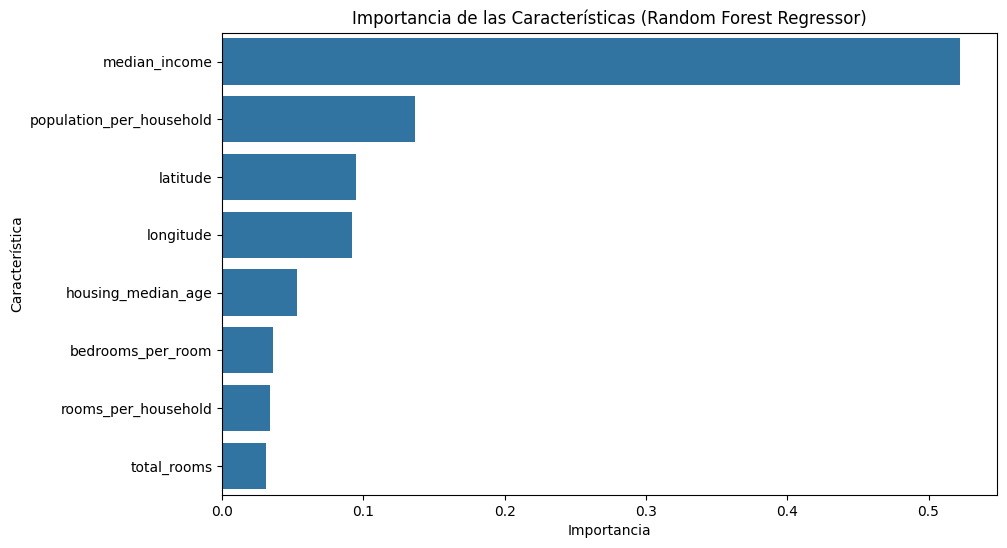

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest Regressor model
feature_importances = rf_reg_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'feature': X_train_selected.columns,
    'importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='importance', ascending=False)

# Display feature importances
print("Importancia de las características en el modelo Random Forest Regressor:")
display(features_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=features_df)
plt.title('Importancia de las Características (Random Forest Regressor)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [22]:
import pandas as pd

# Load the cancellation dataset
cancellation_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Display the first few rows and information about the dataset
display(cancellation_df.head())
cancellation_df.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [23]:
import pandas as pd

# Load the original California housing training dataset
df_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display the first few rows and information about the dataset
display(df_housing.head())
df_housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


**Conclusión Estratégica estratégica señalando los principales factores que influyen en la cancelación:**

El análisis de regresión realizado en el conjunto de datos de California Housing reveló que el ingreso medio (median_income) es el factor más influyente en la predicción del valor medio de las viviendas, según lo indicado por la alta importancia de esta característica en el modelo Random Forest Regressor, que fue el modelo con mejor rendimiento (mayor R² y menor MSE) en comparación con la Regresión Lineal.

Si bien otras características como la latitud (latitude), la longitud (longitude) y la población por hogar (population_per_household) también tienen un impacto significativo, el ingreso medio se destaca como el predictor más fuerte del valor de una propiedad. Esto sugiere que las áreas con mayores ingresos tienden a tener valores de vivienda más altos, lo cual es una perspicacia clave para la planificación urbana, la inversión inmobiliaria y la formulación de políticas.

Las características de ingeniería como la proporción de dormitorios por habitación (bedrooms_per_room) también mostraron cierta importancia, lo que indica que la composición de las viviendas dentro de un hogar puede ser un factor relevante.

En resumen, para entender y predecir el valor de las viviendas en California basado en este conjunto de datos, es fundamental considerar el ingreso medio de los residentes en una zona determinada, junto con la ubicación geográfica y las características del hogar.